In [1]:
## Pre-work

# Import the required libraries and dependencies
import pandas as pd
import csv
from pathlib import Path
%matplotlib inline
import numpy as np


In [2]:
# Import CSV as Dataframe
# Import the data by reading in the CSV file and setting the DatetimeIndex 
whale_navs_csv = pd.read_csv(
    Path('./Resources/whale_navs.csv'),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)

# Review the first and last 5 rows of the DataFrame
display(whale_navs_csv.head())
display(whale_navs_csv.tail())


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,31.546221,14.364969,63.319419,64.668648,342.57
2020-09-08,31.491425,14.337851,63.238988,64.344083,333.21
2020-09-09,31.526541,14.368297,63.409792,64.460992,339.79
2020-09-10,31.486896,14.388256,63.308920,64.306412,333.89
2020-09-11,31.473747,14.360482,63.281442,64.241088,334.06


In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns

# Using the Pandas isnull function in conjunction with the sum function, check the DataFrame for missing values
display(whale_navs_csv.isnull().sum())

# Drop any rows with all missing values
daily_returns = whale_navs_csv.pct_change().dropna()

# Review the first five rows of the daily returns DataFrame.
display(daily_returns.head())

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
S&P 500                        0
dtype: int64

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


In [4]:
# Use the describe function to review summary stats including the standard deviation and mean.
daily_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,-0.000009,-0.000026,0.000036,0.000147,0.000429
std,0.001405,0.002199,0.000996,0.003256,0.011550
min,-0.012910,-0.016720,-0.014563,-0.019076,-0.109424
25%,-0.000381,-0.000534,-0.000193,-0.001082,-0.003197
50%,0.000004,-0.000012,0.000007,0.000027,0.000549
75%,0.000440,0.000498,0.000240,0.001515,0.005160
max,0.011505,0.015944,0.010128,0.021761,0.090603


<AxesSubplot:title={'center':'Daily Returns of the 4 funds and the S&P 500'}, xlabel='date'>

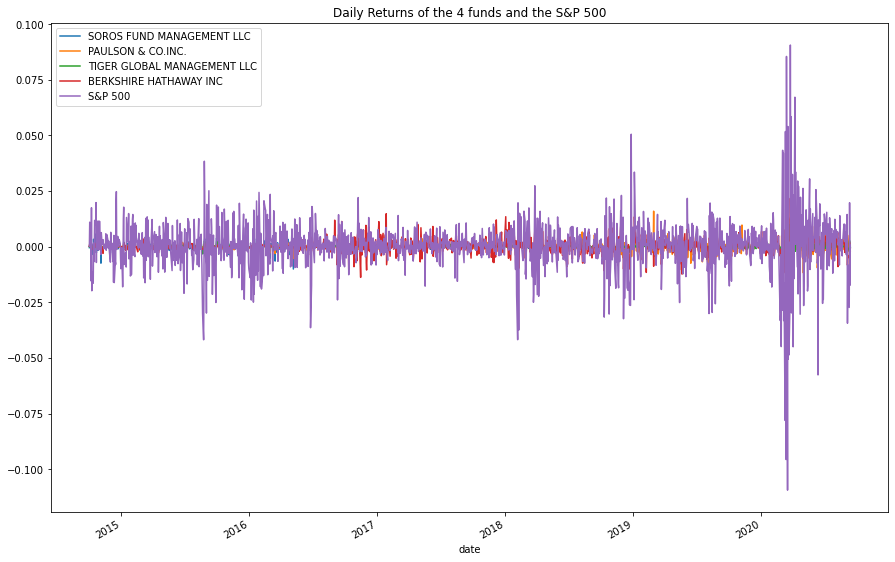

In [5]:
## Quantatative Analysis
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns.plot(figsize=(15,10), title='Daily Returns of the 4 funds and the S&P 500')

In [6]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,0.999558,1.000150,1.000013,1.000171,1.000154
2014-10-03,1.000609,1.000518,1.000407,1.001420,1.011165
2014-10-06,1.003066,1.000510,1.000474,1.001688,1.009982
2014-10-07,1.000437,1.000193,1.000265,1.001100,0.994392
2014-10-08,1.000828,1.000563,1.000507,1.001943,1.011783


<AxesSubplot:title={'center':'Cumulative Returns of the 4 funds and the S&P 500'}, xlabel='date'>

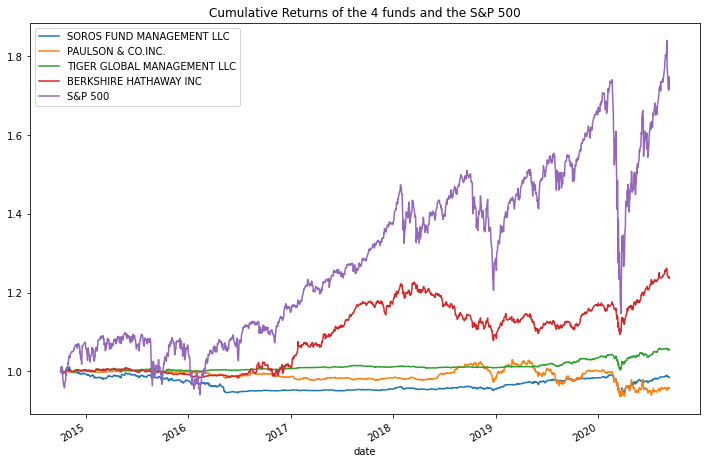

In [7]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns.plot(figsize=(12,8), title='Cumulative Returns of the 4 funds and the S&P 500')

In [8]:
# Analysis:
# Question Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?
# Answer: Based on the cumulative return data and the visualization, the S&P 500 outperformed all four funds over the span of the six years except in three brief instances in 2014, 2015, and the beginning of 2016. The S&P's responsiveness to market volatility is greater than any of the other four funds. It would be interesting to look at the beta of these four funds as a next step.

In [9]:
## Analyze the Volatility

<AxesSubplot:title={'center':'Volatility of the 4 funds and the S&P 500'}>

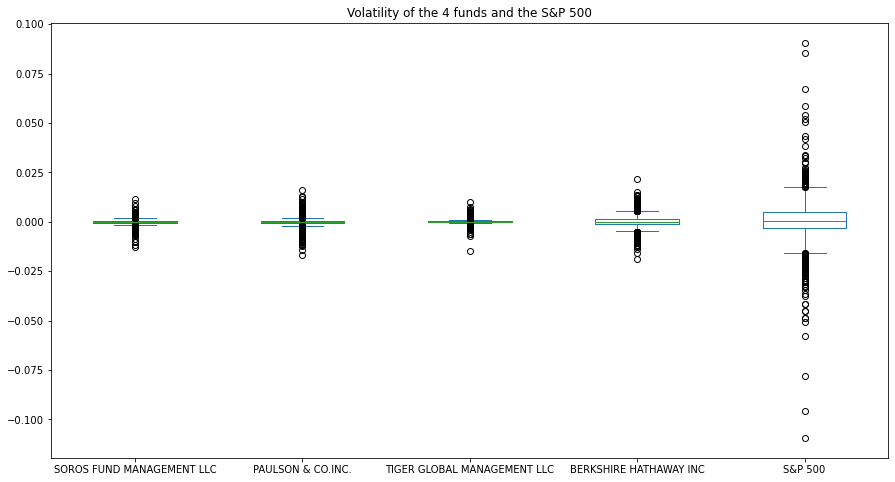

In [10]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot(kind='box', figsize=(15,8), title='Volatility of the 4 funds and the S&P 500')

In [11]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Using the Pandas drop function, remove the S&P 500 column
daily_returns_4_funds = daily_returns.drop(columns=['S&P 500'])

# Review the resulting DataFrame
daily_returns_4_funds.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587
2014-10-08,0.000390,0.000369,0.000242,0.000842


<AxesSubplot:title={'center':'Volatility of the 4 funds'}>

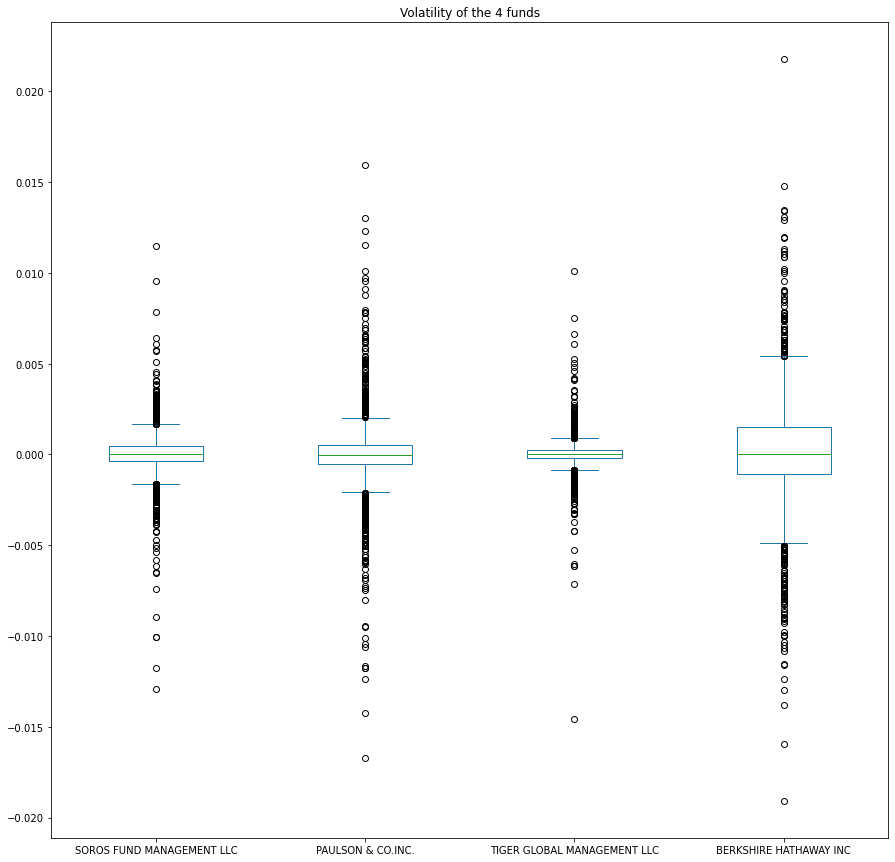

In [12]:
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
daily_returns_4_funds.plot(kind='box', figsize=(15,15), title='Volatility of the 4 funds')

In [13]:
# Analysis:
# Question Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?
# Answer: Based on the box plot visualization of just the four fund portfolios, the most volatile fund was Berkshire Hathaway Inc as seen with the greatest spread. The least volatile fund was Tiger Global Management LLC as seen with the smallest spread.

In [14]:
## Analyze the Risk
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# call the Pandas `std` function on the `daily_returns` DataFrame
standard_deviations = daily_returns.std().sort_values()

# Review the standard deviations sorted smallest to largest
standard_deviations

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [15]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Calculate the annualized standard deviation, using the standard_deviation
# from the daily_returns DataFrame multiplied by the square root (np.sqrt)
# of the number of trading days in a year (252)
annualized_standard_deviations = standard_deviations * np.sqrt(252)

# Review the annual standard deviations smallest to largest
annualized_standard_deviations.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'The rolling standard deviation of the 4 portfolios and the S&P 500'}, xlabel='date'>

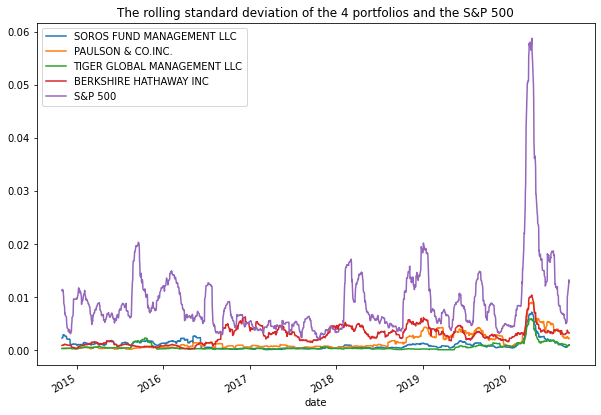

In [16]:
# Plot
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
daily_returns.rolling(window=21).std().plot(figsize=(10,7), title= 'The rolling standard deviation of the 4 portfolios and the S&P 500')

<AxesSubplot:title={'center':'The rolling standard deviation of the 4 portfolios'}, xlabel='date'>

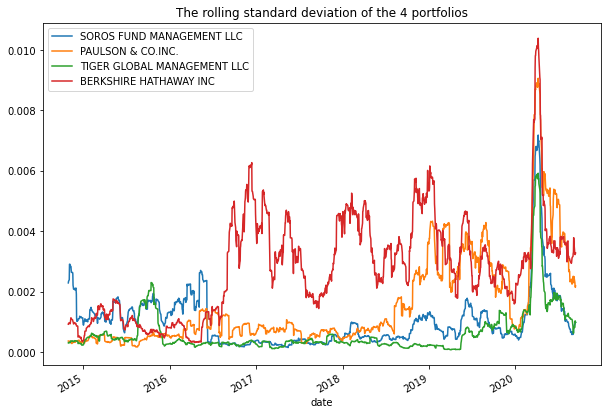

In [17]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
daily_returns_4_funds.rolling(window=21).std().plot(figsize=(10,7), title='The rolling standard deviation of the 4 portfolios')

In [18]:
# Analysis
# Answer the following three questions:

# 1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?
# Answer: Based on the annualized standard deviation, none of the portfolios pose more risk than the S&P 500. The next riskiest portfolio is Berkshire Hathaway Inc's.

# 2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?
# Answer: Based on the rolling metrics, the risk of each portfolio doesn't increase at the same time that the risk of the S&P 500 increases except for one instance in the middle of 2020.

# 3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?
# Answer: Based on the rolling standard deviations of only the four fund portfolios, the portfolio that poses the most risk is Berkshire Hathaway Inc's. It doesn't change much over time.

In [19]:
## Analyze the Risk-Return Profile


In [20]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
trading_days = 252
annual_average_returns = daily_returns.mean() * trading_days

# Review the annual average returns sorted from lowest to highest
annual_average_returns.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [21]:
# Sharpe Ratios
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Sharpe ratio = Annualized average return ÷ Annualized standard deviation (risk-free rate is essentially zero, so no need to include)
sharpe_ratios = annual_average_returns/annualized_standard_deviations
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'The annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500'}>

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,-0.000009,-0.000026,0.000036,0.000147,0.000429
std,0.001405,0.002199,0.000996,0.003256,0.011550
min,-0.012910,-0.016720,-0.014563,-0.019076,-0.109424
25%,-0.000381,-0.000534,-0.000193,-0.001082,-0.003197
50%,0.000004,-0.000012,0.000007,0.000027,0.000549
75%,0.000440,0.000498,0.000240,0.001515,0.005160
max,0.011505,0.015944,0.010128,0.021761,0.090603


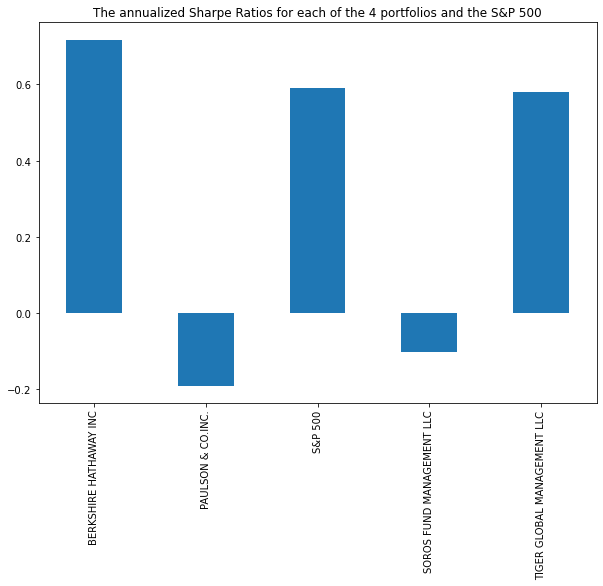

In [22]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
display(sharpe_ratios.plot.bar(figsize=(10,7), title='The annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500'))

# review summary stats for funds and S&P 500
display(daily_returns.describe())

In [23]:
# Analysis
# Question Which of the four portfolios offers the best risk-return profile? Which offers the worst?
# Answer: The portfolio that offers the best risk-return profile is Berskhire Hathaway Inc with a Sharpe Ratio of 0.717512. The portfolio that offers the worst risk-return profile is Paulson & Co. Inc with a Sharpe Ratio of -0.189998

In [26]:
## Diversify the Portfolio
# Calculate the variance of the S&P 500 using a rolling 60-day window.
market_variance_60_days = daily_returns['S&P 500'].rolling(window=60).var()
# Visualize the last five rows of the variance of the S&P 500.
market_variance_60_days.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

In [27]:
# Calculate the covariance using a 60-day rolling window 
bhi_rolling_60_covariance = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns['S&P 500'])
# Review the last five rows of the covariance data
bhi_rolling_60_covariance.tail()


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [31]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Calculate the rolling beta by dividing BHI’s 60-day rolling covariance
# by the 60-day rolling variance of the market
bhi_rolling_60_beta = bhi_rolling_60_covariance / market_variance_60_days
# Review the last five rows of the beta information
bhi_rolling_60_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [33]:
# Calculate the average of the 60-day rolling beta
bhi_rolling_60_beta.mean()


0.2214986101354593

<AxesSubplot:title={'center':'The 60 day rolling beta of Berkshire Hathaway Inc compared to the market (S&P 500)'}, xlabel='date'>

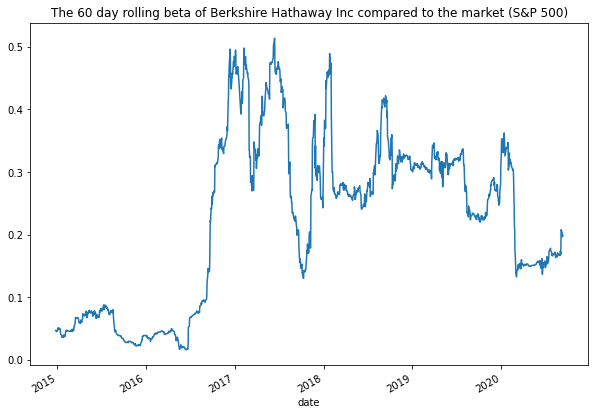

In [34]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
bhi_rolling_60_beta.plot(figsize=(10,7), title='The 60 day rolling beta of Berkshire Hathaway Inc compared to the market (S&P 500)')

In [36]:
# For portfolio two, using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. 
tiger_rolling_60_covariance = daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['S&P 500'])
# Review the last five rows of the covariance of the portfolio.
tiger_rolling_60_covariance.tail()


date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [38]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
tiger_rolling_60_beta = tiger_rolling_60_covariance/market_variance_60_days
# Review the last five rows of the beta information
tiger_rolling_60_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [39]:
# Calculate the average of the 60-day rolling beta
tiger_rolling_60_beta.mean()



0.03093001487238774

<AxesSubplot:title={'center':'The 60 day rolling beta of Tiger Global Managemement LLC compared to the market (S&P 500)'}, xlabel='date'>

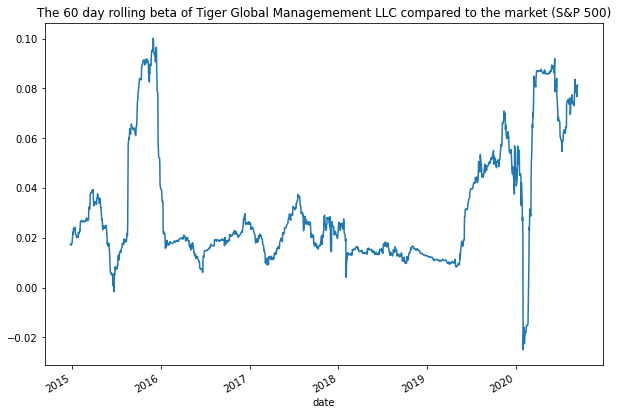

In [43]:
# Plot the rolling beta 
tiger_rolling_60_beta.plot(figsize=(10,7), title='The 60 day rolling beta of Tiger Global Managemement LLC compared to the market (S&P 500)')
